In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
from Wind.Results import DBResults, DBMeasures
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from statsmodels.genmod.generalized_linear_model import GLM
import pandas as pd
import numpy as np


In [44]:
query={'experiment':'MLP_s2s_best', 'status':'done'}

results = DBResults(conn=mongolocal)
results.retrieve_results(query)


In [58]:
results.sample(0.75)
a=results.extract_result()

In [46]:
measure = DBMeasures(conn=mongolocaltest)

measure.retrieve_measures()


In [82]:


meas = 'SpecEnt'
var='wind_direction_sin'
b1=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas)
b2=measure.extract_measure_sites(sites= a[:,0], var='wind_direction_sin', measure=meas)
b3=measure.extract_measure_sites(sites= a[:,0], var='wind_direction_cos', measure=meas)
b4=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure='Stab3m')
data = pd.DataFrame({'test':a[:,1], f'{meas}_wind_speed':b1[:,1],f'{meas}_wind_direction_sin':b2[:,1], 
                     f'{meas}_wind_direction_cos':b3[:,1],f'Stab3m_wind_speed':b4[:,1]})
model = GLM.from_formula(f'test ~ {meas}_wind_speed + {meas}_wind_direction_sin + {meas}_wind_direction_cos + Stab3m_wind_speed', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                94955
Model:                            GLM   Df Residuals:                    94950
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                         0.14667
Method:                          IRLS   Log-Likelihood:                -43596.
Date:                Thu, 12 Sep 2019   Deviance:                       13926.
Time:                        07:56:39   Pearson chi2:                 1.39e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [80]:
meas = 'SpecEnt'
meas2 = 'Stab3m'
b1=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas)
b2=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas2)
data = pd.DataFrame({'test':a[:,1], f'{meas}_wind_speed':b1[:,1],f'{meas2}_wind_speed':b2[:,1]})
model = GLM.from_formula(f'test ~ {meas}_wind_speed + {meas2}_wind_speed', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                94993
Model:                            GLM   Df Residuals:                    94990
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.15683
Method:                          IRLS   Log-Likelihood:                -46797.
Date:                Thu, 12 Sep 2019   Deviance:                       14898.
Time:                        07:55:20   Pearson chi2:                 1.49e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.7771      0

In [61]:
meas = 'SpecEnt'
var='wind_speed'
b=measure.extract_measure_sites(sites= a[:,0], var=var, measure=meas)
data = pd.DataFrame({'test':a[:,1], meas:b[:,1]})

In [62]:
model = GLM.from_formula(f'test ~ {meas}', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                94993
Model:                            GLM   Df Residuals:                    94991
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.17736
Method:                          IRLS   Log-Likelihood:                -52639.
Date:                Thu, 12 Sep 2019   Deviance:                       16847.
Time:                        07:47:24   Pearson chi2:                 1.68e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.7100      0.035    647.082      0.0

<Figure size 432x288 with 0 Axes>

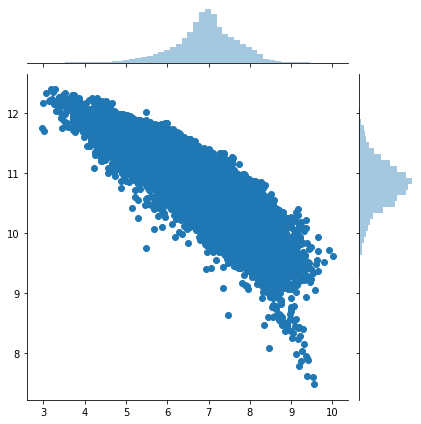

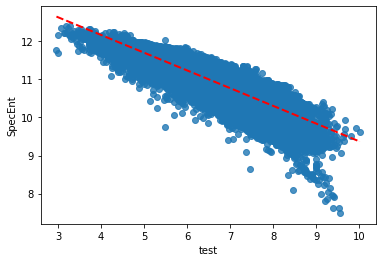

In [63]:
fig = plt.figure()
sns.jointplot(a[:,1], b[:,1])
fig = plt.figure()
sns.regplot('test',meas, data=data, truncate=True, line_kws={'color':'red', 'linewidth':2,'linestyle':'--'})

In [ ]:
sns.distplot(data, label=l, kde=True, norm_hist=True)

In [6]:
measure.variables

['wind_speed',
 'temperature',
 'density',
 'pressure',
 'wind_direction_cos',
 'wind_direction_sin']

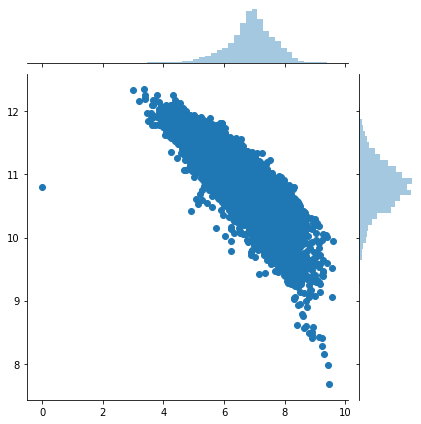

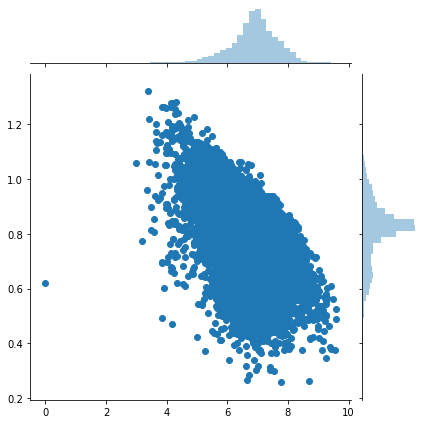

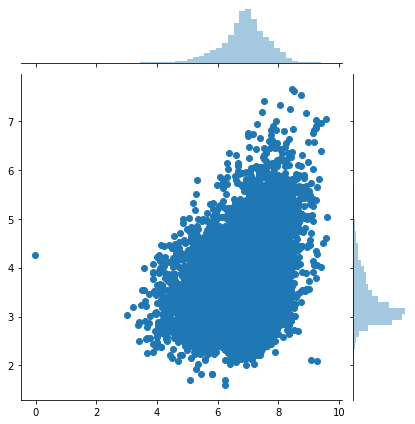

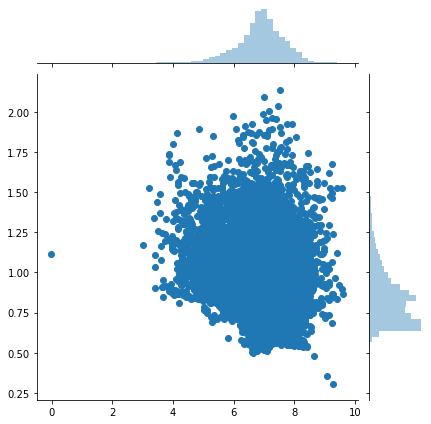

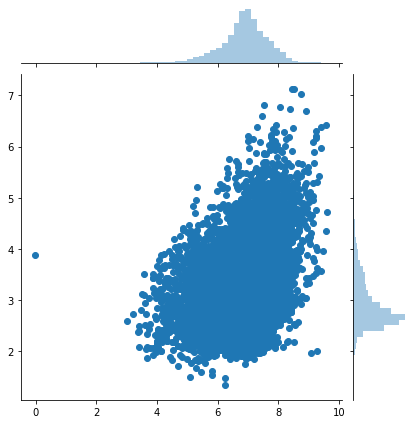

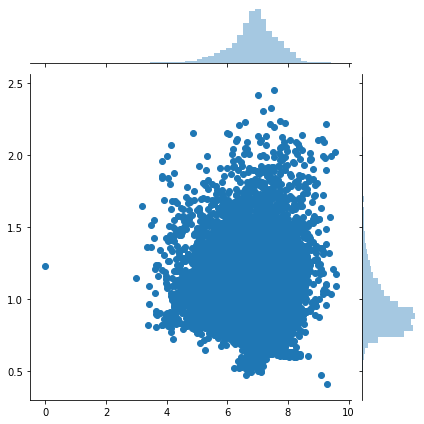

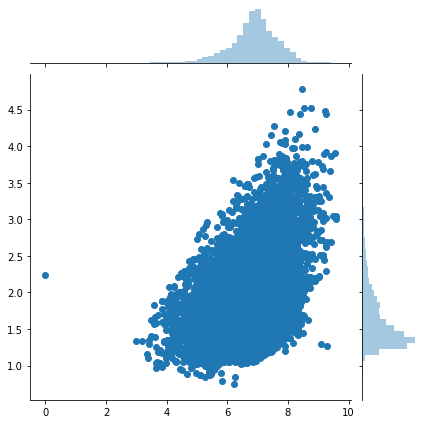

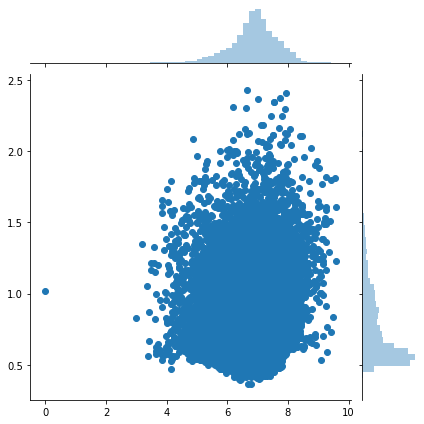

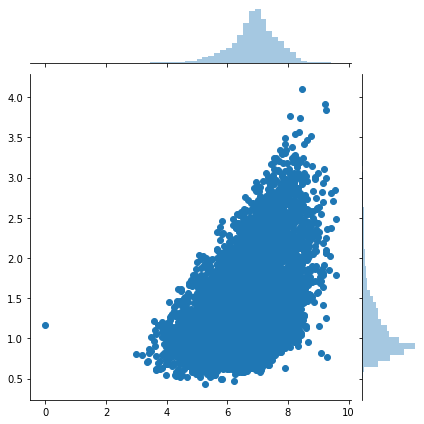

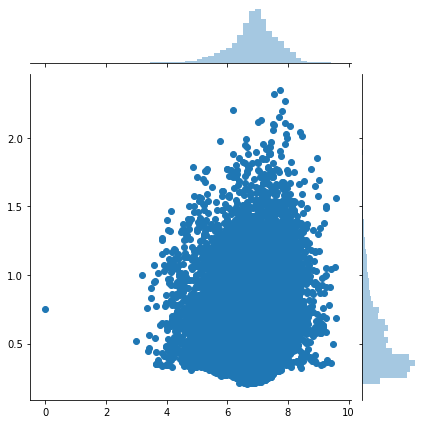

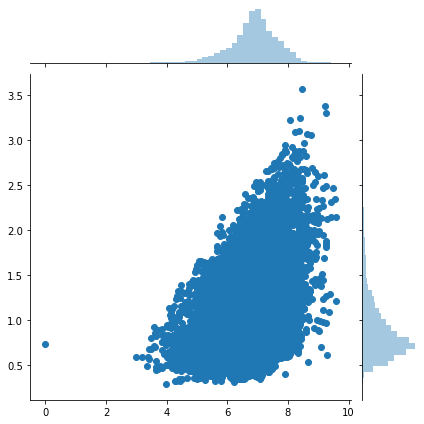

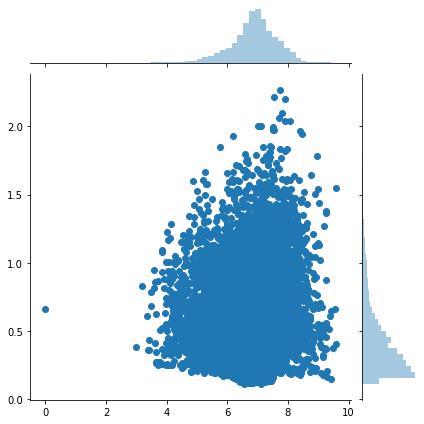

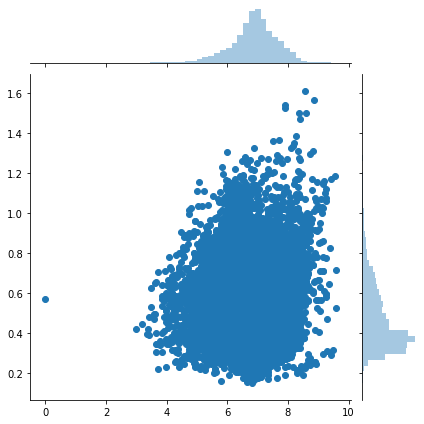

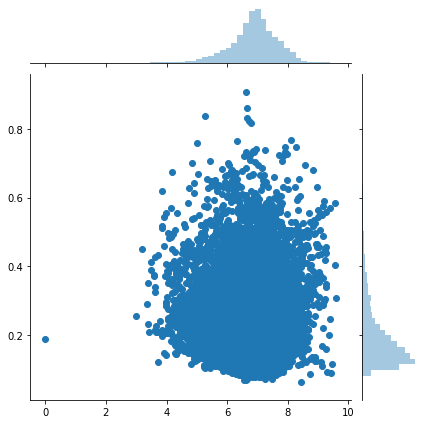

In [43]:
for m in measure.measures:
    b=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
    sns.jointplot(a[:,1], b[:,1])